<a href="https://colab.research.google.com/github/Santiagodiaz1103/ciencia-datos-i-2025-a-g1/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Proyecto.csv to Proyecto (1).csv

📊 Estadísticas descriptivas mejoradas:


<ipython-input-2-097315ee14a6>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Horas_de_sueno"].fillna(df["Horas_de_sueno"].median(), inplace=True)
<ipython-input-2-097315ee14a6>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,N,Media,Mediana,Moda,Mínimo,Máximo,Rango,Desv.Estandar,Varianza,Asimetría
Horas_estudiadas,6538,19.98,20.0,20,1,44,43,5.99,35.93,0.01
Asistencia,6538,80.00,80.0,67,60,100,40,11.55,133.34,0.01
Horas_de_sueno,6538,7.03,7.0,7,4,10,6,1.47,2.16,-0.02
Sesiones_de_tutoria,6538,1.49,1.0,1,0,8,8,1.23,1.52,0.82
Actividad_fisica,6538,2.97,3.0,3,0,6,6,1.03,1.06,-0.03
Nota_examen,6538,67.24,67.0,68,55,101,46,3.90,15.18,1.65


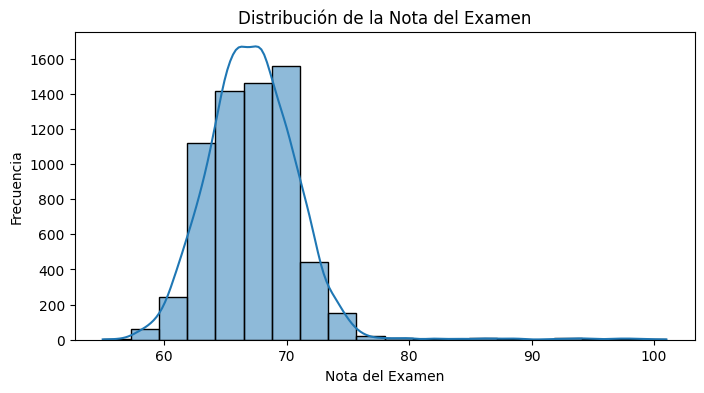

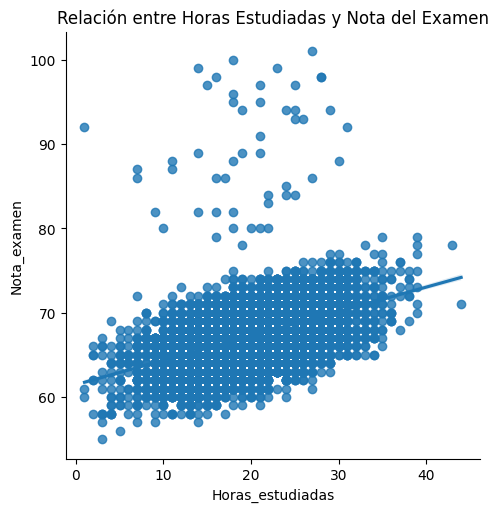

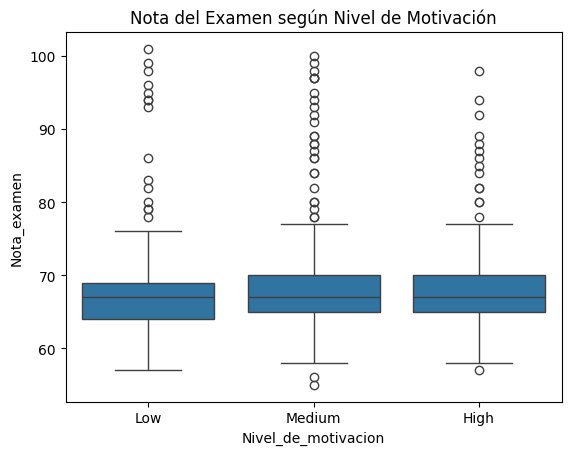

<ipython-input-2-097315ee14a6>:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Genero", y="Nota_examen", data=df, ci="sd")


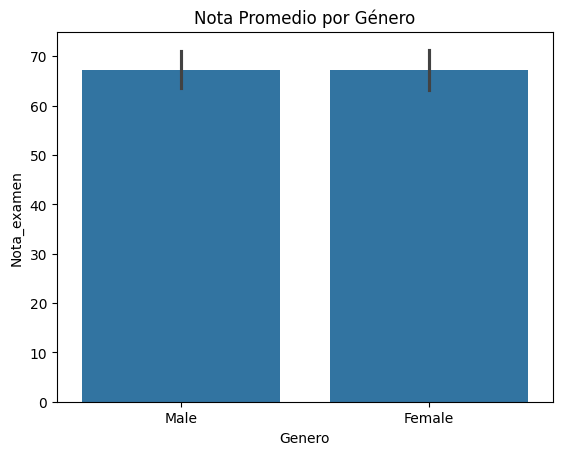

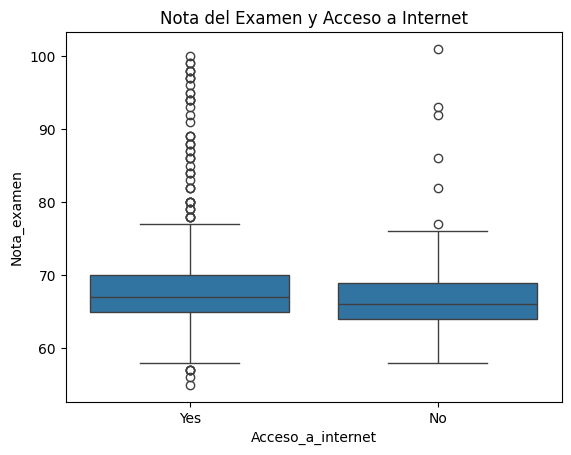

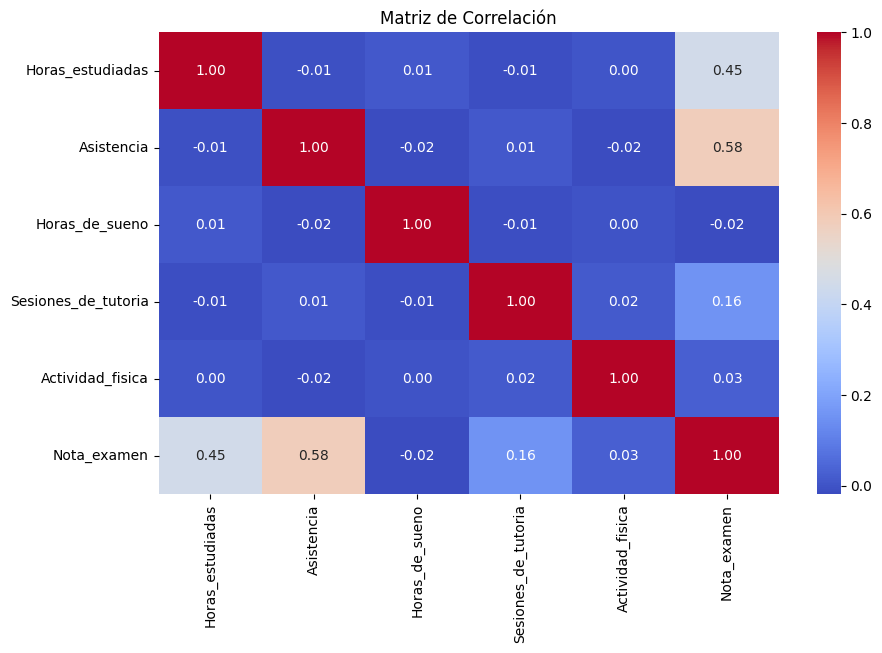

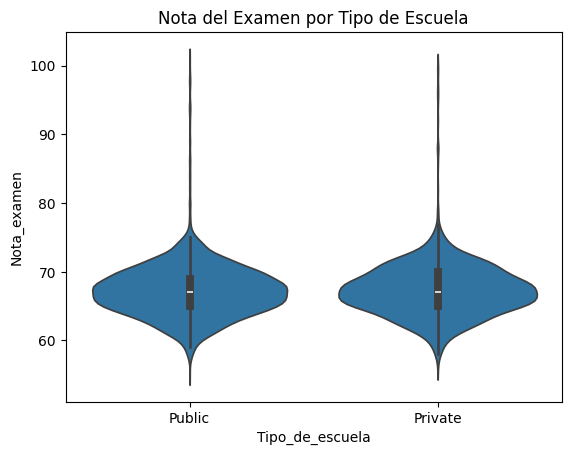

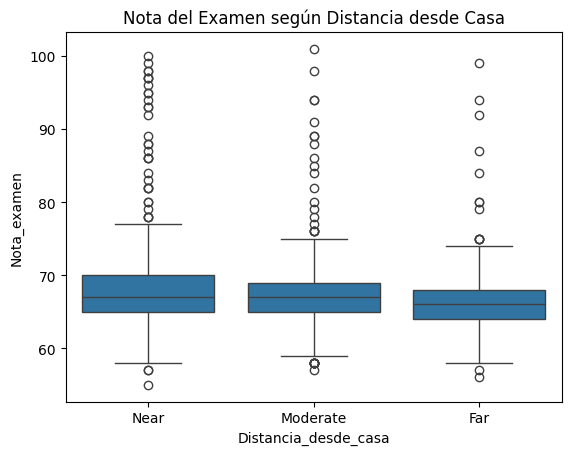


Conclusiones:
- Los estudiantes con más horas de estudio tienden a obtener mejores calificaciones.
- La motivación y el acceso a internet también influyen positivamente.
- Las variables más correlacionadas con el rendimiento son horas de estudio, asistencia y actividades extracurriculares.
- El tipo de escuela y la distancia desde casa tienen un impacto menos evidente.


In [ ]:
# PROYECTO FINAL - CIENCIA DE DATOS COMPLETO Y MEJORADO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Proyecto.csv", sep=";")
columnas = [
    "Horas_estudiadas", "Asistencia", "Actividades_extracurriculares",
    "Horas_de_sueno", "Nivel_de_motivacion", "Acceso_a_internet",
    "Sesiones_de_tutoria", "Tipo_de_escuela", "Actividad_fisica",
    "Distancia_desde_casa", "Genero", "Nota_examen"
]
df.columns = columnas
numeric_columns = ["Horas_estudiadas", "Asistencia", "Horas_de_sueno",
                   "Sesiones_de_tutoria", "Actividad_fisica", "Nota_examen"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.drop_duplicates()
df = df.dropna(thresh=9)
df["Horas_de_sueno"].fillna(df["Horas_de_sueno"].median(), inplace=True)
df["Actividad_fisica"].fillna(df["Actividad_fisica"].median(), inplace=True)
df.dropna(inplace=True)

df["Genero"] = df["Genero"].str.strip().str.capitalize()
df["Acceso_a_internet"] = df["Acceso_a_internet"].str.strip().str.capitalize()
df["Tipo_de_escuela"] = df["Tipo_de_escuela"].str.strip().str.title()
df["Distancia_desde_casa"] = df["Distancia_desde_casa"].str.strip().str.title()

def estadisticas_detalladas(df, columnas):
    resumen = pd.DataFrame(index=columnas)
    resumen["N"] = df[columnas].count()
    resumen["Media"] = df[columnas].mean()
    resumen["Mediana"] = df[columnas].median()
    resumen["Moda"] = df[columnas].mode().iloc[0]
    resumen["Mínimo"] = df[columnas].min()
    resumen["Máximo"] = df[columnas].max()
    resumen["Rango"] = resumen["Máximo"] - resumen["Mínimo"]
    resumen["Desv.Estandar"] = df[columnas].std()
    resumen["Varianza"] = df[columnas].var()
    return resumen.round(2)

estadisticas = estadisticas_detalladas(df, numeric_columns)
print("\n📊 Estadísticas descriptivas mejoradas:")
display(estadisticas)

# Distribución de la nota
plt.figure(figsize=(8, 4))
sns.histplot(df["Nota_examen"], kde=True, bins=20)
plt.title("Distribución de la Nota del Examen")
plt.xlabel("Nota del Examen")
plt.ylabel("Frecuencia")
plt.show()

# Horas estudiadas vs Nota
sns.lmplot(x="Horas_estudiadas", y="Nota_examen", data=df)
plt.title("Relación entre Horas Estudiadas y Nota del Examen")
plt.show()

# Nota por Nivel de Motivación
sns.boxplot(x="Nivel_de_motivacion", y="Nota_examen", data=df)
plt.title("Nota del Examen según Nivel de Motivación")
plt.show()

# Nota promedio por Género
sns.barplot(x="Genero", y="Nota_examen", data=df, ci="sd")
plt.title("Nota Promedio por Género")
plt.show()

# Acceso a internet
sns.boxplot(x="Acceso_a_internet", y="Nota_examen", data=df)
plt.title("Nota del Examen y Acceso a Internet")
plt.show()

# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Nota por tipo de escuela
sns.violinplot(x="Tipo_de_escuela", y="Nota_examen", data=df)
plt.title("Nota del Examen por Tipo de Escuela")
plt.show()

# Nota por distancia desde casa
sns.boxplot(x="Distancia_desde_casa", y="Nota_examen", data=df)
plt.title("Nota del Examen según Distancia desde Casa")
plt.show()

# --- 4. CONCLUSIONES ---
print("\nConclusiones:")
print("- Los estudiantes con más horas de estudio tienden a obtener mejores calificaciones.")
print("- La motivación y el acceso a internet también influyen positivamente.")
print("- Las variables más correlacionadas con el rendimiento son horas de estudio, asistencia y actividades extracurriculares.")
print("- El tipo de escuela y la distancia desde casa tienen un impacto menos evidente.")
